In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(12)
num_observations = 5000

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

simulated_separableish_features = np.vstack((x1, x2)).astype(np.float32)
simulated_labels = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))
simulated_separableish_features, simulated_labels

(array([[-0.2015173 , -0.6833582 ],
        [ 0.37451947, -0.8280822 ],
        [-0.16189468, -1.2471066 ],
        ...,
        [ 2.3255963 ,  4.181329  ],
        [ 0.24707289,  4.2294044 ],
        [ 1.7190224 ,  4.8253503 ]], dtype=float32),
 array([0., 0., 0., ..., 1., 1., 1.]))

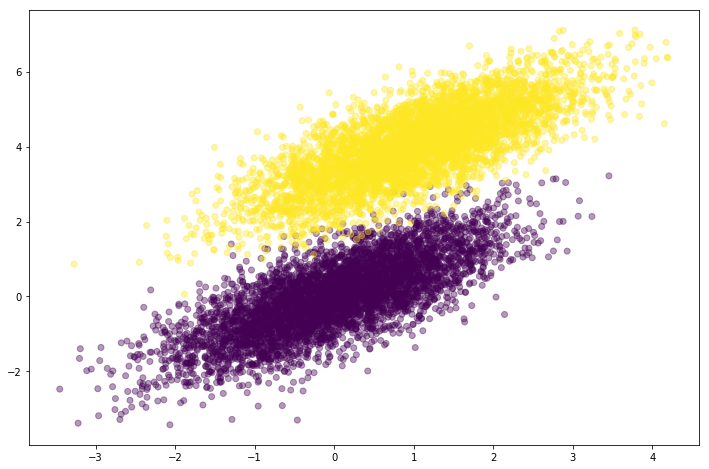

In [19]:
plt.figure(figsize=(12,8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = simulated_labels, alpha = .4)

In [20]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    
    for step in xrange(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        
        # Print log-likelihood every so often
#         if step % 10000 == 0:
        print log_likelihood(features, target, weights)
        
    return weights

weights = logistic_regression(simulated_separableish_features, simulated_labels,
                     num_steps = 3000, learning_rate = 5e-3, add_intercept=True)

weights

-120417.7113284467
-58198.11190530641
-16935.656433678698
-2244.7129680608446
-566.2909151162969
-306.25212080383295
-234.64699068321076
-211.42267569437243
-202.91349862085508
-199.76015499516575
-198.59786873901476
-198.13482953101285
-197.90697795801216
-197.7575157988403
-197.6352248649464
-197.52356294475797
-197.41711310778544
-197.3139933582851
-197.21344866606444
-197.11509273743275
-197.0186693593556
-196.9239764837624
-196.83084121075768
-196.73911075519666
-196.64864851295414
-196.55933182954215
-196.47105040287323
-196.38370497692188
-196.29720620947106
-196.21147366863212
-196.12643493608027
-196.04202480308922
-195.95818454876962
-195.8748612916479
-195.7920074068738
-195.70958000223305
-195.62754044690146
-195.54585394752488
-195.4644891667906
-195.38341788016072
-195.30261466689984
-195.22205663192034
-195.14172315534137
-195.0615956669694
-194.9816574431967
-194.90189342407348
-194.82229004853306
-194.74283510595836
-194.66351760245948
-194.58432764039958
-194.50525630

-168.57787099559079
-168.51750494742743
-168.45719908866639
-168.3969534842759
-168.33676819919765
-168.27664329834835
-168.2165788466179
-168.15657490886878
-168.09663154993612
-168.03674883462645
-167.97692682771708
-167.91716559395587
-167.85746519806014
-167.79782570471653
-167.73824717857968
-167.6787296842722
-167.61927328638393
-167.55987804947046
-167.50054403805385
-167.44127131662083
-167.382059949623
-167.3229100014749
-167.26382153655533
-167.2047946192044
-167.14582931372456
-167.08692568437922
-167.02808379539204
-166.9693037109464
-166.91058549518482
-166.85192921220803
-166.79333492607435
-166.7348027007991
-166.6763326003537
-166.617924688665
-166.55957902961507
-166.5012956870395
-166.4430747247277
-166.38491620642168
-166.32682019581492
-166.2687867565528
-166.21081595223083
-166.15290784639456
-166.09506250253798
-166.0372799841038
-165.97956035448243
-165.92190367701093
-165.8643100149724
-165.80677943159506
-165.74931199005243
-165.69190775346104
-165.634566784880

-148.74321318474557
-148.71355008605215
-148.68396073606945
-148.65444509919678
-148.6250031393987
-148.59563482020639
-148.56634010471498
-148.5371189555854
-148.507971335043
-148.47889720487785
-148.44989652644344
-148.420969260658
-148.3921153680038
-148.36333480852593
-148.3346275418334
-148.3059935270984
-148.27743272305588
-148.24894508800406
-148.22053057980378
-148.19218915587848
-148.1639207732144
-148.1357253883596
-148.10760295742483
-148.07955343608302
-148.05157677956907
-148.0236729426802
-147.99584187977518
-147.96808354477508
-147.94039789116292
-147.91278487198315
-147.88524443984278
-147.85777654690983
-147.83038114491498
-147.8030581851504
-147.77580761847042
-147.74862939529098
-147.72152346559028
-147.69448977890872
-147.66752828434866
-147.64063893057477
-147.61382166581433
-147.58707643785664
-147.56040319405372
-147.53380188132087
-147.5072724461354
-147.48081483453848
-147.45442899213364
-147.42811486408866
-147.40187239513457
-147.37570152956584
-147.349602211

-141.6656930048789
-141.660242401644
-141.65481959089823
-141.6494244610251
-141.6440569006365
-141.6387167985734
-141.6334040439068
-141.6281185259386
-141.62286013420348
-141.6176287584688
-141.61242428873663
-141.6072466152441
-141.6020956284645
-141.59697121910867
-141.59187327812523
-141.58680169670222
-141.58175636626788
-141.57673717849113
-141.5717440252833
-141.5667767987984
-141.56183539143416
-141.55691969583324
-141.55202960488367
-141.5471650117198
-141.54232580972374
-141.5375118925252
-141.5327231540032
-141.52795948828665
-141.52322078975487
-141.51850695303844
-141.5138178730208
-141.50915344483755
-141.50451356387896
-141.49989812578903
-141.49530702646777
-141.49074016207044
-141.48619742900962
-141.48167872395544
-141.47718394383554
-141.47271298583692
-141.46826574740643
-141.46384212625037
-141.4594420203365
-141.455065327894
-141.45071194741388
-141.44638177765032
-141.44207471762113
-141.43779066660753
-141.4335295241559
-141.4292911900776
-141.42507556444968
-1

-140.78542846004018
-140.78501097053106
-140.78459629569846
-140.7841844174827
-140.78377531793006
-140.7833689791936
-140.78296538353158
-140.7825645133079
-140.78216635099045
-140.78177087915174
-140.78137808046694
-140.78098793771517
-140.78060043377712
-140.78021555163608
-140.77983327437622
-140.7794535851829
-140.7790764673418
-140.77870190423826
-140.77832987935707
-140.77796037628178
-140.77759337869406
-140.77722887037396
-140.7768668351982
-140.7765072571401
-140.77615012026996
-140.77579540875342
-140.7754431068513
-140.77509319891936
-140.7747456694077
-140.7744005028597
-140.77405768391242
-140.7737171972958
-140.77337902783185
-140.77304316043444
-140.77270958010854
-140.7723782719503
-140.77204922114612
-140.771722412972
-140.77139783279387
-140.77107546606607
-140.77075529833144
-140.7704373152212
-140.7701215024536
-140.76980784583407
-140.76949633125466
-140.7691869446935
-140.76887967221427
-140.76857449996587
-140.76827141418204
-140.76797040118055
-140.767671447363

-140.7280394226952
-140.72802028649195
-140.72800128925243
-140.72798242997723
-140.72796370767446
-140.72794512135903
-140.7279266700527
-140.72790835278414
-140.7278901685891
-140.7278721165101
-140.72785419559634
-140.72783640490394
-140.72781874349576
-140.727801210441
-140.72778380481543
-140.72776652570195
-140.7277493721894
-140.7277323433735
-140.72771543835583
-140.72769865624525
-140.72768199615575
-140.72766545720864
-140.72764903853107
-140.72763273925648
-140.72761655852403
-140.7276004954799
-140.72758454927535
-140.72756871906842
-140.72755300402264
-140.7275374033079
-140.72752191609987
-140.72750654157963
-140.72749127893476
-140.72747612735822
-140.72746108604883
-140.72744615421104
-140.7274313310552
-140.72741661579687
-140.72740200765756
-140.72738750586424
-140.7273731096493
-140.7273588182506
-140.72734463091146
-140.72733054688058
-140.72731656541222
-140.72730268576552
-140.7272889072053
-140.72727522900144
-140.72726165042897
-140.7272481707683
-140.7272347893

-140.7254300607091
-140.72542999627154
-140.72542993231045
-140.7254298688227
-140.72542980580442
-140.7254297432524
-140.72542968116304
-140.725429619533
-140.7254295583588
-140.7254294976371
-140.72542943736465
-140.72542937753803
-140.72542931815394
-140.72542925920914
-140.72542920070038
-140.72542914262453
-140.72542908497815
-140.7254290277583
-140.72542897096167
-140.7254289145852
-140.72542885862575
-140.72542880308043
-140.72542874794584
-140.72542869321916
-140.72542863889743
-140.72542858497746
-140.72542853145632
-140.72542847833125
-140.72542842559903
-140.7254283732571
-140.72542832130236
-140.72542826973182
-140.72542821854296
-140.72542816773267
-140.7254281172983
-140.7254280672371
-140.72542801754628
-140.72542796822302
-140.7254279192646
-140.72542787066845
-140.72542782243184
-140.72542777455197
-140.72542772702636
-140.72542767985243
-140.7254276330276
-140.72542758654907
-140.72542754041427
-140.725427494621
-140.72542744916646
-140.72542740404816
-140.72542735926

array([-14.09545352,  -5.06012222,   8.29140223])

In [21]:
data_with_intercept = np.hstack((np.ones((simulated_separableish_features.shape[0], 1)),
                                 simulated_separableish_features))
final_scores = np.dot(data_with_intercept, weights)
preds = np.round(sigmoid(final_scores))

print 'Accuracy from scratch: {0}'.format((preds == simulated_labels).sum().astype(float) / len(preds))
# print 'Accuracy from sk-learn: {0}'.format(clf.score(simulated_separableish_features, simulated_labels))

Accuracy from scratch: 0.9948
